<h1 align='center' style='color:black'> Yellow and Pink Cab </h1>

## Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from statsmodels.tsa.stattools import adfuller
import datetime as dt
from datetime import datetime
import cufflinks as cf
from pandas import to_datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

## Loading The Data

In [2]:
Cab_Data = pd.read_excel('cab_data.xlsx')
# Data was put into DataFrame
df1= pd.DataFrame(Cab_Data)
# Printing the head
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
City_Data = pd.read_csv('City.csv')
# Data was put into DataFrame
df2= pd.DataFrame(City_Data)
# Printing the head
df2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
Customer_ID_Data = pd.read_csv('Customer_ID.csv')
# Data was put into DataFrame
df3= pd.DataFrame(Customer_ID_Data)
# Printing the head
df3.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
Transaction_ID_Data = pd.read_csv('Transaction_ID.csv')
# Data was put into DataFrame
df4= pd.DataFrame(Transaction_ID_Data)
# Printing the head
df4.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## EDA (Exploratory Data Analysis)

### 1. Printing the shape

In [6]:
print ("Cab_Data",Cab_Data.shape)
print ("City_Data",City_Data.shape)
print ("Customer_ID_Data",Customer_ID_Data.shape)
print ("Transaction_ID_Data",Transaction_ID_Data.shape)

Cab_Data (359392, 7)
City_Data (20, 3)
Customer_ID_Data (49171, 4)
Transaction_ID_Data (440098, 3)


### 2. Looking for Missing Values

In [7]:
Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [8]:
City_Data .isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [9]:
Customer_ID_Data .isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [10]:
Transaction_ID_Data .isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### 3. Printing Data Type and Capacity of The Data on The Memory

In [11]:
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [12]:
City_Data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [13]:
Customer_ID_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
Transaction_ID_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## Creating Master Data

### 1. Merge Cab_Data & Transaction_ID_Data

In [15]:
# Join with Transaction ID
left = Cab_Data.set_index(['Transaction ID'])
right = Transaction_ID_Data.set_index(['Transaction ID'])
data = left.join(right)
data.head(2)

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
Transaction ID,,,,,,,,
10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card


### 2. Merge Step(1) & Customer_ID_Data

In [16]:
# Join with Customer ID
left = data.set_index([data.index,'Customer ID'])
right = Customer_ID_Data.set_index(['Customer ID'])
data = left.join(right)
data.head(2)

,,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
Transaction ID,Customer ID,,,,,,,,,,
10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Card,Male,28,10813
10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Card,Male,27,9237


### 3. Merge Step(2) & City_Data

In [17]:
# Join with City
left = data.set_index([data.index,'City'])
right = City_Data.set_index(['City'])
data = left.join(right)
data.head(2)

,,,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
Transaction ID,Customer ID,City,,,,,,,,,,,
10000011,29290,ATLANTA GA,2016-01-08,Pink Cab,30.45,370.95,313.635,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,2016-01-06,Pink Cab,28.62,358.52,334.854,Card,Male,27,9237,"814,885","24,701"


In [18]:
data = data.reset_index()

data.head(2)

,Transaction ID,Customer ID,City,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,ATLANTA GA,2016-01-08,Pink Cab,30.45,370.95,313.635,Card,Male,28,10813,"814,885","24,701"
1,10000012,27703,ATLANTA GA,2016-01-06,Pink Cab,28.62,358.52,334.854,Card,Male,27,9237,"814,885","24,701"


## Feature Extraction

### 1. Number of Travel

In [19]:
# Calculating the Number of Travel by grouping the 'Transaction ID' per 'Date_of_Travel'
data['No_of_Travel'] =data.groupby('Date of Travel')['Transaction ID'].transform('count')
# Printing the Data after adding new column 'No_of_Travel'
data.head(2)

,Transaction ID,Customer ID,City,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,No_of_Travel
0,10000011,29290,ATLANTA GA,2016-01-08,Pink Cab,30.45,370.95,313.635,Card,Male,28,10813,"814,885","24,701",111
1,10000012,27703,ATLANTA GA,2016-01-06,Pink Cab,28.62,358.52,334.854,Card,Male,27,9237,"814,885","24,701",109


### 2. Profit

In [20]:
# Calculating the Profit (Profit = Price_Charged - Cost_of_Trip)
data['Profit'] = data['Price Charged'] - data['Cost of Trip']
# Printing the Data after adding new column 'Profit'
data.head(2)

,Transaction ID,Customer ID,City,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,No_of_Travel,Profit
0,10000011,29290,ATLANTA GA,2016-01-08,Pink Cab,30.45,370.95,313.635,Card,Male,28,10813,"814,885","24,701",111,57.315
1,10000012,27703,ATLANTA GA,2016-01-06,Pink Cab,28.62,358.52,334.854,Card,Male,27,9237,"814,885","24,701",109,23.666


### 3. Split 'Date of Travel' into 'Day','Month' and 'Year'

In [21]:
data=data.set_index('Date of Travel')
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year
data.head(2)

,Transaction ID,Customer ID,City,Company,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,No_of_Travel,Profit,day,month,year
Date of Travel,,,,,,,,,,,,,,,,,,
2016-01-08,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,Card,Male,28,10813,"814,885","24,701",111,57.315,8,1,2016
2016-01-06,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,Card,Male,27,9237,"814,885","24,701",109,23.666,6,1,2016


##  Data Description

In [22]:
data.describe()

,Transaction ID,Customer ID,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),No_of_Travel,Profit,day,month,year
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,22.567254,423.443311,286.190113,35.336705,15048.822937,488.744402,137.253198,15.628447,7.500434,2017.045199
std,1.268058e+05,21012.412463,12.233526,274.378911,157.993661,12.594234,7969.409482,298.934035,160.311840,8.827151,3.445095,0.800239
min,1.000001e+07,1.000000,1.900000,15.600000,19.000000,18.000000,2000.000000,25.000000,-220.060000,1.000000,1.000000,2016.000000
25%,1.011081e+07,2705.000000,12.000000,206.437500,151.200000,25.000000,8424.000000,245.000000,28.012000,8.000000,5.000000,2016.000000
50%,1.022104e+07,7459.000000,22.440000,386.360000,282.480000,33.000000,14685.000000,424.000000,81.962000,16.000000,8.000000,2017.000000
75%,1.033094e+07,36078.000000,32.960000,583.660000,413.683200,42.000000,21035.000000,728.000000,190.030000,23.000000,10.000000,2018.000000
max,1.044011e+07,60000.000000,48.000000,2048.030000,691.200000,65.000000,35000.000000,2022.000000,1463.966000,31.000000,12.000000,2018.000000


## Correlation For The Numeric Columns - to see how much those variables  are related 

In [23]:
d=data.corr()
d

,Transaction ID,Customer ID,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),No_of_Travel,Profit,day,month,year
Transaction ID,1.000000,-0.016912,-0.001429,-0.052902,-0.003462,-0.001267,-0.001570,0.268191,-0.087130,0.012021,0.287009,0.941600
Customer ID,-0.016912,1.000000,0.000389,-0.177324,0.003077,-0.004735,-0.013608,-0.026581,-0.306527,0.000650,-0.044656,-0.002539
KM Travelled,-0.001429,0.000389,1.000000,0.835753,0.981848,-0.000369,-0.000544,-0.000200,0.462768,0.001652,-0.001903,-0.001072
Price Charged,-0.052902,-0.177324,0.835753,1.000000,0.859812,-0.003084,0.003228,0.022000,0.864154,-0.004021,-0.061116,-0.036409
Cost of Trip,-0.003462,0.003077,0.981848,0.859812,1.000000,-0.000189,-0.000633,-0.003593,0.486056,0.002091,-0.008370,-0.001773
Age,-0.001267,-0.004735,-0.000369,-0.003084,-0.000189,1.000000,0.003907,-0.003462,-0.005093,-0.001275,-0.002226,-0.000579
Income (USD/Month),-0.001570,-0.013608,-0.000544,0.003228,-0.000633,0.003907,1.000000,-0.001369,0.006148,0.001860,0.000322,-0.001617
No_of_Travel,0.268191,-0.026581,-0.000200,0.022000,-0.003593,-0.003462,-0.001369,1.000000,0.041195,-0.055464,0.357761,0.133514
Profit,-0.087130,-0.306527,0.462768,0.864154,0.486056,-0.005093,0.006148,0.041195,1.000000,-0.008942,-0.096352,-0.060567
day,0.012021,0.000650,0.001652,-0.004021,0.002091,-0.001275,0.001860,-0.055464,-0.008942,1.000000,0.041412,-0.020995


## Data Preprocessing

### 1.Renaming The Columns Names

In [25]:
data.rename({'KM Travelled':'KM_Travelled','Price Charged':'Price_Charged',
             'Cost of Trip':'Cost_of_Trip','Income (USD/Month)':'Income',
             'Customer ID':'Customer_ID','Transaction ID':'Transaction_ID'},axis=1,inplace=True)
## Printing The Columns Names after renamming
data.columns

Index(['Transaction_ID', 'Customer_ID', 'City', 'Company', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Payment_Mode', 'Gender', 'Age',
       'Income', 'Population', 'Users', 'No_of_Travel', 'Profit', 'day',
       'month', 'year'],
      dtype='object')

### 2. Converting Users Column to Integer

In [26]:
data['Users'] = data['Users'].str.replace(',', '').astype('int64')

In [27]:
# Printing The Data Type After Converting
print('Data Type is :',data['Users'].dtypes)

Data Type is : int64


### 3. Converting KM_Travelled Column to Categorical

In [28]:
# First we need to Convert KM_Travelled Column to Integer
data['KM_Travelled']=data['KM_Travelled'].astype(int)

In [29]:
# Printing The Data Type After Converting
print('Data Type is :',data['KM_Travelled'].dtypes)

Data Type is : int32


In [30]:
conds1 = [data['KM_Travelled'].values >= 23 , 
          data['KM_Travelled'].values <= 10, data['KM_Travelled'].between(10, 23)]
choices1 = ['Long_Trip', 'Short_Trip','Medium_Trip']
df1= pd.DataFrame(np.select(conds1, choices1),columns=['KM_Travelled'])
# Printing the head
df1.head()

,KM_Travelled
0,Long_Trip
1,Long_Trip
2,Short_Trip
3,Long_Trip
4,Short_Trip


In [31]:
# Printing the tail
df1.tail()

,KM_Travelled
359387,Short_Trip
359388,Short_Trip
359389,Long_Trip
359390,Short_Trip
359391,Medium_Trip


In [32]:
# Updating The Value of 'KM_Travelled' Column 
data=data.reset_index()
data['KM_Travelled'].update(df1['KM_Travelled'])

In [33]:
# Printing 'KM_Travelled' After Update
data['KM_Travelled']

0           Long_Trip
1           Long_Trip
2          Short_Trip
3           Long_Trip
4          Short_Trip
             ...     
359387     Short_Trip
359388     Short_Trip
359389      Long_Trip
359390     Short_Trip
359391    Medium_Trip
Name: KM_Travelled, Length: 359392, dtype: object

### 4. Converting Profit Column to Integer

In [34]:
# Converting Profit Column to Integer
data['Profit']=data['Profit'].astype(int)

In [35]:
# Printing The Data Type After Converting
print('Data Type is :',data['Profit'].dtypes)

Data Type is : int32


### 5. Converting 'Age' Column to Categorical

In [36]:
d=data['Age']
ages = pd.DataFrame(d)
bins = [15, 25, 35, 45, 55, 65]
labels = ['15-25', '26-35', '36-45', '46-55', '56-65']
data['Age'] = pd.cut(ages['Age'], bins, labels = labels,)
# Printing The 'Age' Column After Converting
data['Age'].head(3)

0    26-35
1    26-35
2    46-55
Name: Age, dtype: category
Categories (5, object): [15-25 < 26-35 < 36-45 < 46-55 < 56-65]

### 6. Converting 'Income' Column to Categorical

In [37]:
conds = [data['Income'].values >= 15000 , data['Income'].values <= 5000, data['Income'].between(5000, 15000)]
choices = ['High_Income', 'Low_Income','Medium_Income']
df= pd.DataFrame(np.select(conds, choices),columns=['Income'])
# Printing the head
df.head()

,Income
0,Medium_Income
1,Medium_Income
2,Medium_Income
3,High_Income
4,Medium_Income


In [38]:
# Printing the tail
df.tail()

,Income
359387,High_Income
359388,Medium_Income
359389,Medium_Income
359390,Medium_Income
359391,Medium_Income


In [39]:
# Updating The Value of 'Income' Column 
data=data.reset_index()
data['Income'].update(df['Income'])

In [40]:
# Printing 'Income' After Update
data['Income']

0         Medium_Income
1         Medium_Income
2         Medium_Income
3           High_Income
4         Medium_Income
              ...      
359387      High_Income
359388    Medium_Income
359389    Medium_Income
359390    Medium_Income
359391    Medium_Income
Name: Income, Length: 359392, dtype: object

### 7. Looking for Missing Values

In [41]:
data.isnull().sum()

index             0
Date of Travel    0
Transaction_ID    0
Customer_ID       0
City              0
Company           0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
Payment_Mode      0
Gender            0
Age               0
Income            0
Population        0
Users             0
No_of_Travel      0
Profit            0
day               0
month             0
year              0
dtype: int64

### 8. Outliers Detection

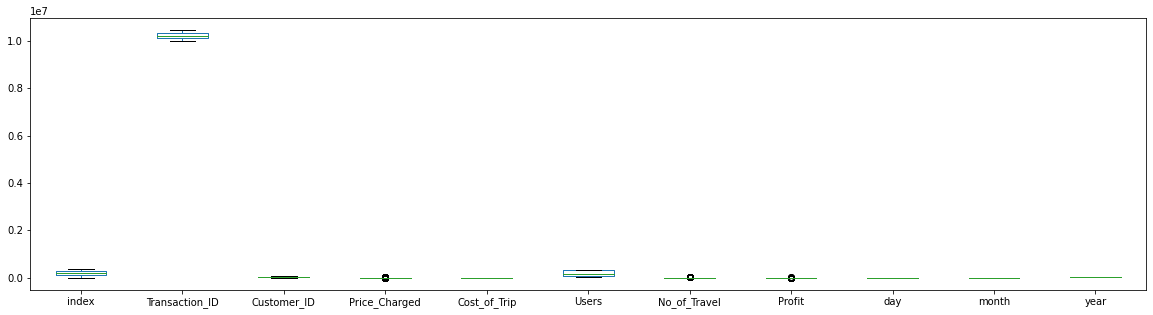

In [42]:
#outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean
data.plot(kind="box",figsize =(20,5))

## Some Statistics

In [43]:
# Printing the values of (Age) column with its domain
data['Age'].value_counts()

26-35    113414
15-25     93344
36-45     75998
46-55     38560
56-65     38076
Name: Age, dtype: int64

In [44]:
# Printing the values of (Gender) column with its domain
data['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

In [45]:
# Printing the values of (Company) column with its domain
data['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [46]:
# Printing the values of (Payment_Mode) column with its domain
data['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

In [47]:
# Printing the values of (KM_Travelled) column with its domain
data['KM_Travelled'].value_counts()

Long_Trip      175226
Medium_Trip    103231
Short_Trip      80935
Name: KM_Travelled, dtype: int64

In [48]:
# Printing the values of (City) column with its domain
data['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [49]:
# Find the Duplicate Rows
data.duplicated().sum()

0

## Correlation For The Categorical Columns - to see how much those variables  are related 

## Contingency Table

### 1. Gender & Company

In [50]:
contigency1= pd.crosstab(data['Gender'], data['Company']) 
contigency1

Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


In [51]:
from scipy.stats import chi2_contingency
# Chi-square test of independence. 
# chi2: The test statistic
# p: The p-value of the test
# dof: Degrees of freedom
# expected: The expected frequencies, based on the marginal sums of the table
c, p, dof, expected = chi2_contingency(contigency1)
# Print the p-value
print(p)

3.982674650131372e-25


- The p-value > 0.05 which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that Company and Gender are independent.

### 2. Gender & Age

In [52]:
contigency2= pd.crosstab(data['Gender'], data['Age']) 
contigency2

Age,15-25,26-35,36-45,46-55,56-65
Gender,,,,,
Female,40060,48603,32020,16572,16225
Male,53284,64811,43978,21988,21851


In [53]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency2)
# Print the p-value
print(p)

0.006630823241464151


- The p-value is < 0.05 which means that we will reject the null hypothesis at 95% level of confidence. The null hypothesis was that Age and Gender are independent.

### 3. Gender & Income

In [54]:
contigency3= pd.crosstab(data['Gender'], data['Income']) 
contigency3

Income,High_Income,Low_Income,Medium_Income
Gender,,,
Female,74765,18402,60313
Male,100759,24048,81105


In [55]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency3)
# Print the p-value
print(p)

0.016085183877326187


- The p-value is < 0.05 which means that we will reject the null hypothesis at 95% level of confidence. The null hypothesis was that Income and Gender are independent.

### 4. Gender & Payment_Mode

In [56]:
contigency4= pd.crosstab(data['Gender'], data['Payment_Mode']) 
contigency4     

Payment_Mode,Card,Cash
Gender,,
Female,92025,61455
Male,123479,82433


In [57]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency4)
# Print the p-value
print(p)

0.9644797341429527


- The p-value > 0.05 which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that Payment_Mode and Gender are independent.

### 5. Gender & KM_Travelled

In [58]:
contigency5= pd.crosstab(data['Gender'], data['KM_Travelled']) 
contigency5     

KM_Travelled,Long_Trip,Medium_Trip,Short_Trip
Gender,,,
Female,74874,44109,34497
Male,100352,59122,46438


In [59]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency5)
# Print the p-value
print(p)

0.8651567563272696


- The p-value > 0.05 which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that Payment_Mode and Gender are independent.

## Putting The Final Data into a Form of csv File

In [61]:
data.head(2)

,index,Date of Travel,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income,Population,Users,No_of_Travel,Profit,day,month,year
0,0,2016-01-08,10000011,29290,ATLANTA GA,Pink Cab,Long_Trip,370.95,313.635,Card,Male,26-35,Medium_Income,"814,885",24701,111,57,8,1,2016
1,1,2016-01-06,10000012,27703,ATLANTA GA,Pink Cab,Long_Trip,358.52,334.854,Card,Male,26-35,Medium_Income,"814,885",24701,109,23,6,1,2016


In [62]:
data.drop(['index'],axis=1,inplace=True)
data.head(2)

,Date of Travel,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Gender,Age,Income,Population,Users,No_of_Travel,Profit,day,month,year
0,2016-01-08,10000011,29290,ATLANTA GA,Pink Cab,Long_Trip,370.95,313.635,Card,Male,26-35,Medium_Income,"814,885",24701,111,57,8,1,2016
1,2016-01-06,10000012,27703,ATLANTA GA,Pink Cab,Long_Trip,358.52,334.854,Card,Male,26-35,Medium_Income,"814,885",24701,109,23,6,1,2016


In [63]:
data.to_csv("D:\\ Final_Data.csv")

## Data Visualization

## 1. Plotting  The Pink vs Yellow Cabs

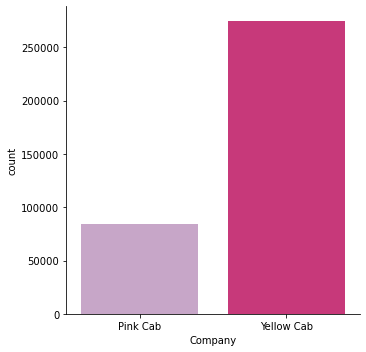

In [64]:
sns.catplot(x="Company",data=data, kind="count",palette="PuRd")  

##  2. The Age of Customers Those  Use Pink Cab and Other Those Use Yello Cab

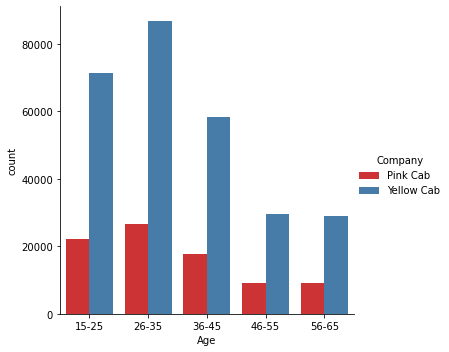

In [65]:
sns.catplot(x="Age",hue="Company",data=data, kind="count",palette="Set1")  

## 3. The Gender of Customers Those  Use Pink Cab and Other Those Use Yello Cab

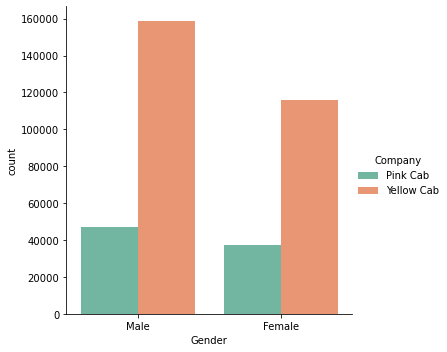

In [66]:
sns.catplot(x="Gender",hue="Company",data=data, kind="count",palette="Set2")  

## 4. Users Covered by Company 

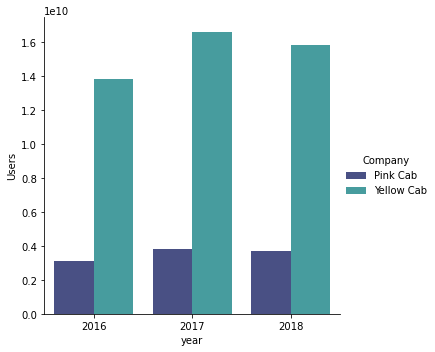

In [67]:
a=data.groupby([data['year'],data['Company']]).Users.sum().to_frame()
a = a.reset_index()
sns.catplot(x="year", y="Users",hue= 'Company',kind="bar", data=a, palette='mako')

## 5. Customers Covered by Company 

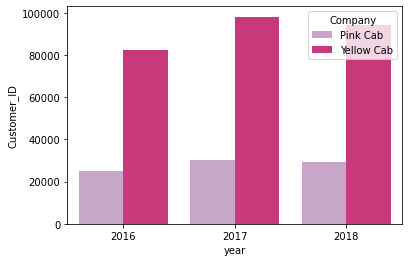

In [68]:
c=data.groupby([data['year'],data['Company']]).Customer_ID.count().to_frame()
c = c.reset_index()
sns.barplot(x = 'year', y = 'Customer_ID',hue= 'Company', data = c,palette = 'PuRd', orient = 'v')

## 6. Customers Covered by Company in each City

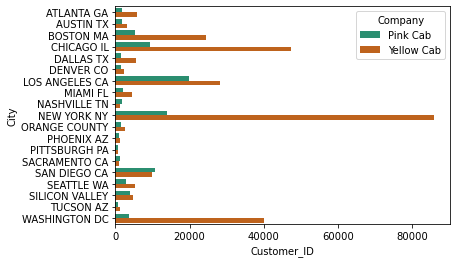

In [69]:
city=data.groupby([data['Company'], data['City']]).Customer_ID.count().to_frame()
city = city.reset_index()
sns.barplot(x = 'Customer_ID', y = 'City',hue= 'Company', data = city,palette = 'Dark2', orient = 'h')

## 7. Number of Customers Based on Trip Distance

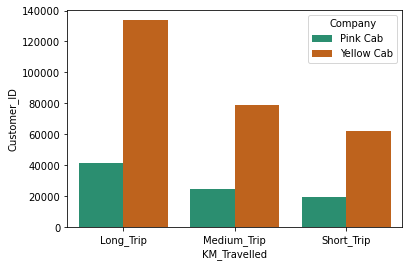

In [70]:
dc=data.groupby([data['Company'], data['KM_Travelled']]).Customer_ID.count().to_frame()
dc = dc.reset_index()
sns.barplot(y = 'Customer_ID', x = 'KM_Travelled',hue= 'Company', data = dc,palette = 'Dark2', orient = 'v')

## 8. Number of Travels for Both Cabs in all City During 3 years

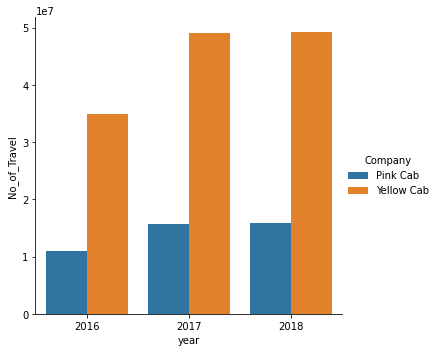

In [71]:
d1=data.groupby([data['year'],data['Company']])['No_of_Travel'].sum().to_frame()
#d1.plot(kind='bar')
d1 = d1.reset_index()
sns.catplot(x="year", y="No_of_Travel",hue= 'Company',kind="bar", data=d1)

## 9. Number of Travels within a Month for Both Cabs in all City

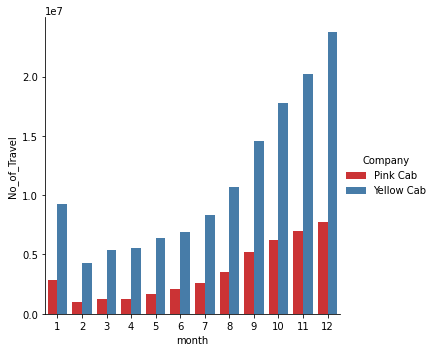

In [72]:
dm=data.groupby([data['month'],data['Company']])['No_of_Travel'].sum().to_frame()
dm = dm.reset_index()
sns.catplot(x="month", y="No_of_Travel",hue= 'Company',kind="bar", data=dm, palette="Set1")

## 10. Number of Travels for Both Cabs by City During 3 years

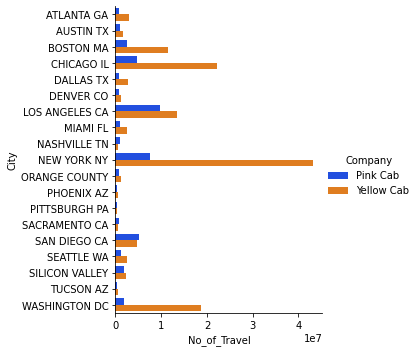

In [73]:
dc=data.groupby([data['City'],data['Company']])['No_of_Travel'].sum().to_frame()
dc = dc.reset_index()
sns.catplot(y="City", x="No_of_Travel",hue= 'Company',kind="bar", data=dc, palette="bright")

## 11. Seasonality in Number of Customers Using the Cab Service

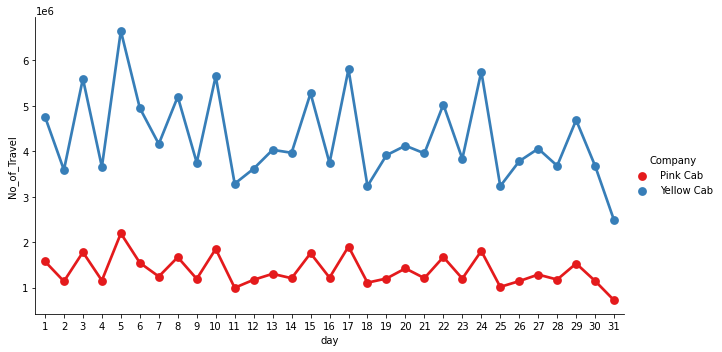

In [74]:
da=data.groupby([data['day'],data['Company']])['No_of_Travel'].sum().to_frame()
da = da.reset_index()
sns.catplot(x="day", y="No_of_Travel",hue= 'Company',kind="point", data=da, palette="Set1", aspect=14.7/8.27)

## 12. Monthly Profit for Both Cabs in all City During 3 years

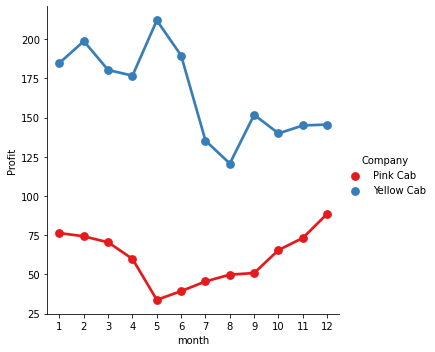

In [75]:
d3=data.groupby([data['month'],data['Company']])['Profit'].mean().to_frame()
#d1.plot(kind='bar')
d3 = d3.reset_index()
sns.catplot(x="month", y="Profit",hue= 'Company',kind='point', data=d3, palette="Set1")

## 13. Yearly Profit for Both Cabs in all City During 3 years

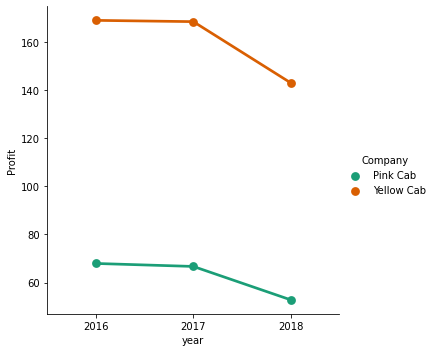

In [76]:
d2=data.groupby([data['year'],data['Company']])['Profit'].mean().to_frame()
d2 = d2.reset_index()
sns.catplot(x="year", y="Profit",hue= 'Company',kind='point', data=d2, palette="Dark2")

## 14. Profit Based on Customers’s Income

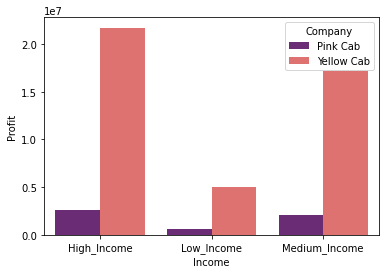

In [77]:
d_inc=data.groupby([data['Income'],data['Company']]).Profit.sum().to_frame()
d_inc = d_inc.reset_index()
sns.barplot(y = 'Profit', x = 'Income',hue= 'Company', data = d_inc,palette = 'magma', orient = 'v')

## 15. Average of Profit Based on 'KM_Travelled'

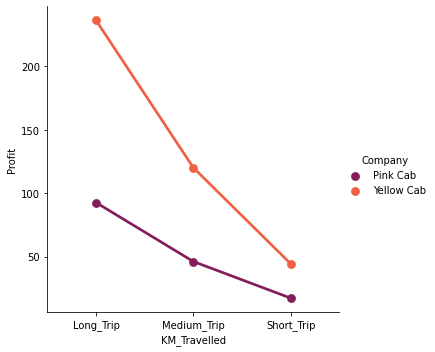

In [78]:
dkm=data.groupby([data['KM_Travelled'],data['Company']])['Profit'].mean().to_frame()
#d1.plot(kind='bar')
dkm = dkm.reset_index()
sns.catplot(y="Profit", x="KM_Travelled",hue= 'Company',kind='point', data=dkm, palette="rocket")

## 16. Profit by City

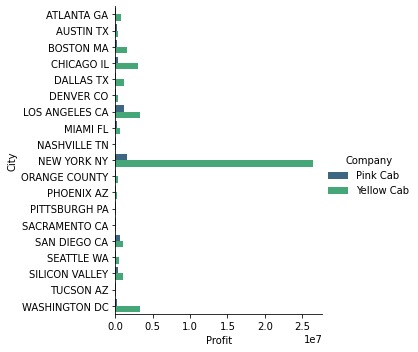

In [79]:
d=data.groupby([data['City'],data['Company']])['Profit'].sum().to_frame()
d = d.reset_index()
sns.catplot(y="City", x="Profit",hue= 'Company',kind='bar', data=d, palette="viridis")

## 17. Seasonality in the Profit

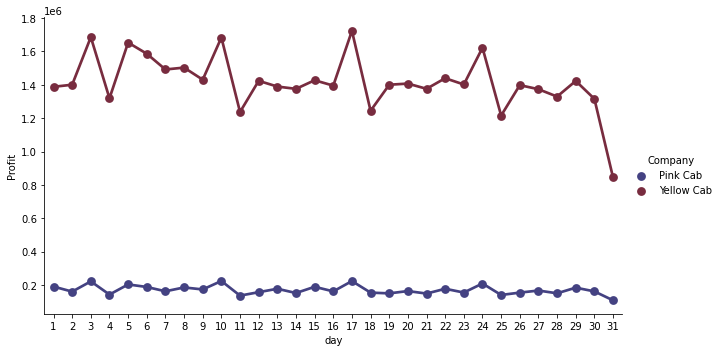

In [80]:
da=data.groupby([data['day'],data['Company']])['Profit'].sum().to_frame()
da = da.reset_index()
sns.catplot(x="day", y="Profit",hue= 'Company',kind="point", data=da, palette="icefire", aspect=14.7/8.27)

<h1 align='center' style='color:black'>  Profit Predicted Model for Pink Cab </h1>

## Selecting the Data

In [81]:
# Date_of_Travel was put as an index
data=data.set_index('Date of Travel')

In [82]:
data_profit1=data['Profit'].loc[data['Company'] == 'Pink Cab']
# Printing the head
data_profit1.head()

Date of Travel
2016-01-08    57
2016-01-06    23
2016-01-02    27
2016-01-07    25
2016-01-03    16
Name: Profit, dtype: int32

In [83]:
# Printing the shape
data_profit1.shape

(84711,)

In [84]:
# we will use the averages daily profits value for that month instead,
# and we are using the start of each month as the timestamp.
pi = data_profit1.resample('MS').mean()

In [85]:
# Have a quick peek 2017 profit data
pi['2017']

Date of Travel
2017-01-01    86.052480
2017-02-01    76.502929
2017-03-01    77.545576
2017-04-01    61.536651
2017-05-01    36.527842
2017-06-01    48.345655
2017-07-01    49.444256
2017-08-01    51.320680
2017-09-01    57.865988
2017-10-01    69.072235
2017-11-01    73.181232
2017-12-01    94.285849
Freq: MS, Name: Profit, dtype: float64

## Visualizing Profit Time Series Data

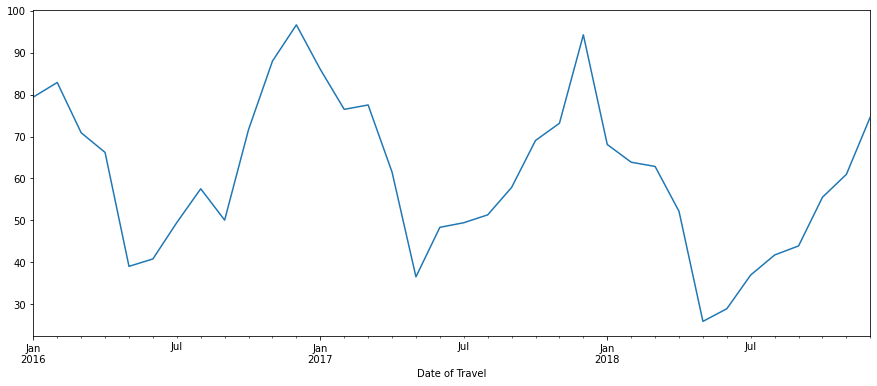

In [86]:
pi.plot(figsize=(15, 6))
plt.show()

### Inference :
- The time-series has a seasonality pattern, such as profits are always high at the beginning of the year and low at the end .

##  Testing the Stationary

In [87]:
# ADF (Augmented Dickey Fuller) Test
dftest = adfuller(pi, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                  1.075533
p-value                         0.995002
#Lags Used                      8.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


### Inference :
- If  p-value <= 0.05: we can reject the null hypothesis ( series is stationary). 
- If  p-value > 0.05: we fail to reject the null hypothesis (which means the series is not stationary).

- In our above graph, p-value > 0.05, which implies that the series is not stationary.  

## Making a Time Series Stationary

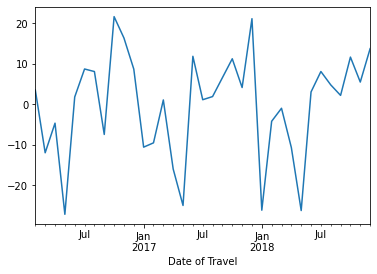

In [88]:
# Applying differencing on our series and plotting the results
pi = pi- pi.shift(1)
pi.dropna().plot()

In [89]:
pi.head()

Date of Travel
2016-01-01          NaN
2016-02-01     3.476440
2016-03-01   -11.998630
2016-04-01    -4.690510
2016-05-01   -27.192924
Freq: MS, Name: Profit, dtype: float64

In [90]:
# Dropping NaN 
pi = pi[1:]
pi.head()

Date of Travel
2016-02-01     3.476440
2016-03-01   -11.998630
2016-04-01    -4.690510
2016-05-01   -27.192924
2016-06-01     1.771620
Freq: MS, Name: Profit, dtype: float64

## Time series forecasting with ARIMA

### Parameters account for seasonality, trend, and noise in data

In [91]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in 
list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### Parameter Selection for our profit’s ARIMA Time Series Model

In [104]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(pi,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:272.8550700788952
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:170.25950768194176
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:159.06202939275605
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:53.509067602771935
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:166.30168163056507
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:156.86070484032984
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:57.426272558186405
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:55.509498999257374
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:266.3392547707866
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:165.8046556886171
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:142.59947078126126
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:50.33213479305433
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:157.42836311675484
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:142.51474737871877
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:59.384982602139075
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:52.306773810637736
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:282.480586858192
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:177.8098019920437

### Inference :
- The above output suggests that SARIMAX(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 46.46. Therefore we should consider this to be optimal option.

## Fitting the ARIMA model

In [105]:
mod = sm.tsa.statespace.SARIMAX(pi,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
#print(results.summary().tables[1])

## Validating Forecasts

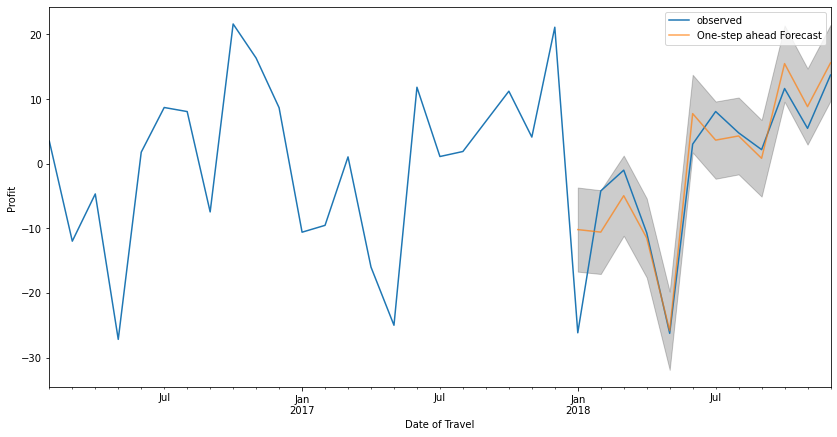

In [138]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = pi['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date of Travel')
ax.set_ylabel('Profit')
plt.legend()
plt.show()

### Inference :
- Our forecasts align with the true values very well.

### The Mean Squared Error of our forecasts

In [107]:
y_forecasted = pred.predicted_mean
y_truth = pi['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 32.14


### The Root Mean Squared Error of our forecasts

In [110]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 5.67


### Inference :
- Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily Profit for pink cabs in the test set within 5.67 of the real profits.

## Producing and visualizing forecasts

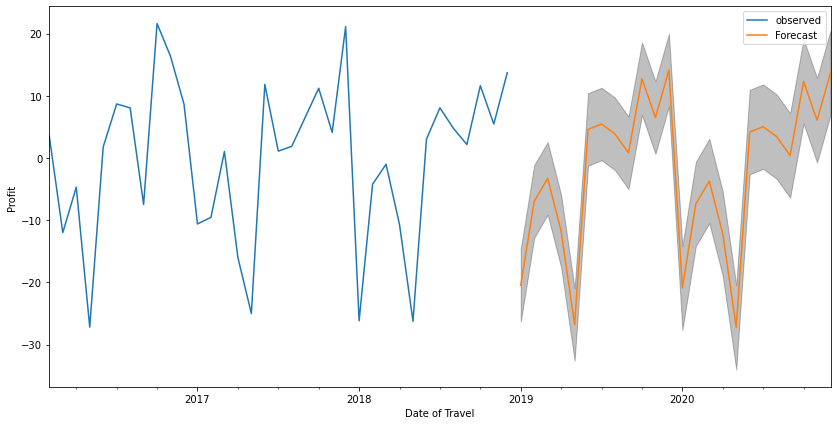

In [133]:
# Forecasts for two years for pink cab into the future
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = pi.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date of Travel')
ax.set_ylabel('Profit')
plt.legend()
plt.show()

<h1 align='center' style='color:black'>  Profit Predicted Model for Yellow Cab </h1>

## Selecting the Data

In [119]:
data_profit2=data['Profit'].loc[data['Company'] == 'Yellow Cab']
# Printing the head
data_profit2.head()

Date of Travel
2016-01-02    877
2016-01-09    895
2016-01-03    232
2016-01-06    504
2016-01-07    944
Name: Profit, dtype: int32

In [120]:
# Printing the shape
data_profit2.shape

(274681,)

In [121]:
# we will use the averages daily profits value for that month instead,
# and we are using the start of each month as the timestamp.
py = data_profit2.resample('MS').mean()

In [122]:
# Have a quick peek 2017 profit data
py['2017']

Date of Travel
2017-01-01    195.017199
2017-02-01    204.422359
2017-03-01    199.409873
2017-04-01    191.179849
2017-05-01    228.837085
2017-06-01    181.839710
2017-07-01    139.538586
2017-08-01    132.205830
2017-09-01    160.870893
2017-10-01    147.322798
2017-11-01    156.795245
2017-12-01    149.991671
Freq: MS, Name: Profit, dtype: float64

## Visualizing Profit Time Series Data

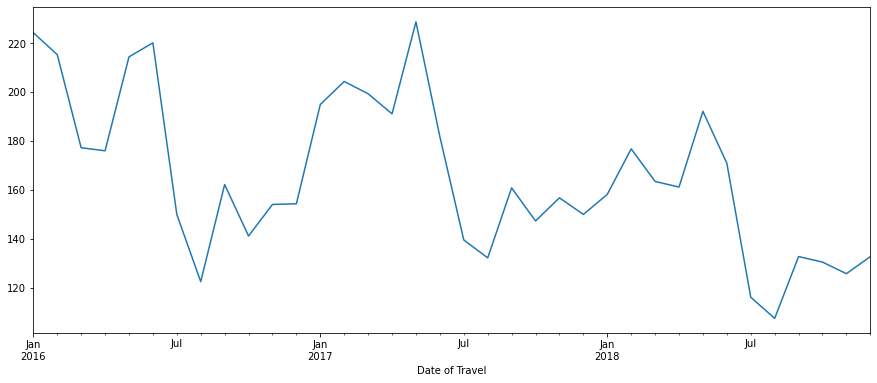

In [123]:
py.plot(figsize=(15, 6))
plt.show()

### Inference :
- The time-series has a seasonality pattern, such as profits are always high at the beginning of the year and low at the end .

##  Testing the Stationary

In [124]:
# ADF (Augmented Dickey Fuller) Test
dftest = adfuller(py, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                  0.136081
p-value                         0.968440
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


### Inference :
- If  p-value <= 0.05: we can reject the null hypothesis ( series is stationary). 
- If  p-value > 0.05: we fail to reject the null hypothesis (which means the series is not stationary).

- In our above graph, p-value > 0.05, which implies that the series is not stationary.  

## Making a Time Series Stationary

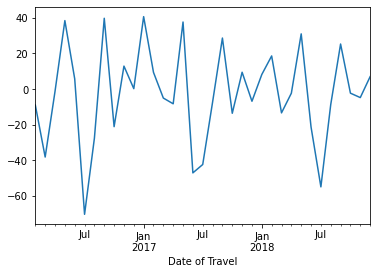

In [125]:
# Applying differencing on our series and plotting the results
py = py- py.shift(1)
py.dropna().plot()

In [126]:
py.head()

Date of Travel
2016-01-01          NaN
2016-02-01    -8.964578
2016-03-01   -38.108983
2016-04-01    -1.262756
2016-05-01    38.456215
Freq: MS, Name: Profit, dtype: float64

In [127]:
# Dropping NaN 
py = py[1:]
py.head()

Date of Travel
2016-02-01    -8.964578
2016-03-01   -38.108983
2016-04-01    -1.262756
2016-05-01    38.456215
2016-06-01     5.745559
Freq: MS, Name: Profit, dtype: float64

## Time series forecasting with ARIMA

### Parameters account for seasonality, trend, and noise in data

In [128]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq2 = [(x[0], x[1], x[2], 12) for x in 
list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq2[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq2[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq2[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq2[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### Parameter Selection for our profit’s ARIMA Time Series Model

In [129]:
import warnings
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq2:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(py,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results2 = mod2.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results2.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:323.04444756144704
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:197.00875794979677
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:194.141207091445
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:75.87844680024364
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:194.77694819710902
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:186.62104826445088
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:84.99051695099358
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:77.88183279086311
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:314.61033943404107
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:190.99956837043783
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:180.77201388135683
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:65.11419798237577
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:194.7052241748969
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:177.23381804492482
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:83.84403422926202
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:68.25195310050353
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:336.65461857477726
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:204.7948056411114
AR

### Inference :
- The above output suggests that SARIMAX(1, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 52.04. Therefore we should consider this to be optimal option.

## Fitting the ARIMA model

In [130]:
mod2 = sm.tsa.statespace.SARIMAX(py,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()
#print(results.summary().tables[1])

## Validating Forecasts

In [152]:
pred_ci2['final']= abs(pred_ci2['lower Profit'] + pred_ci2['upper Profit'])
#pd.DataFrame(p)
pred_ci2['final']

2019-01-01     16.773515
2019-02-01     54.043157
2019-03-01     55.209302
2019-04-01     21.070408
2019-05-01     40.614770
2019-06-01     20.178522
2019-07-01    133.938093
2019-08-01      7.135836
2019-09-01     29.182478
2019-10-01     13.714464
2019-11-01     24.767431
2019-12-01     34.067359
2020-01-01      2.113908
2020-02-01     74.171817
2020-03-01     74.147236
2020-04-01     41.249644
2020-05-01     21.626194
2020-06-01      0.051421
2020-07-01    152.977442
2020-08-01     27.416618
2020-09-01     10.092225
2020-10-01     34.046216
2020-11-01     43.908721
2020-12-01     54.450213
Freq: MS, Name: final, dtype: float64

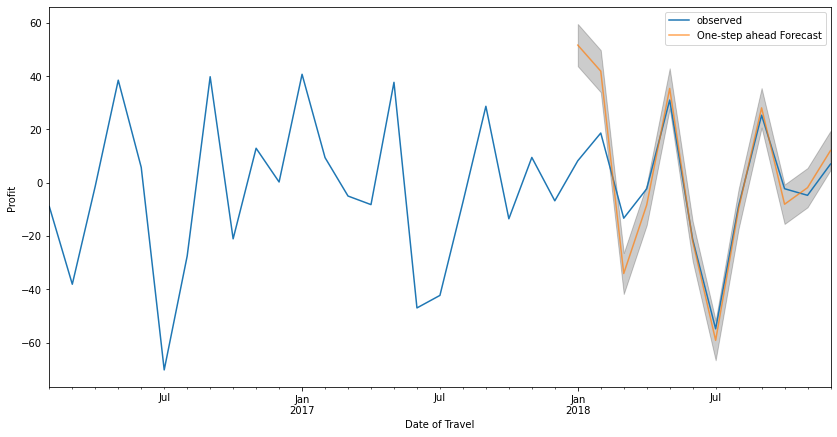

In [132]:
pred2 = results2.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci2 = pred2.conf_int()
ax = py['2016':].plot(label='observed')
pred2.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date of Travel')
ax.set_ylabel('Profit')
plt.legend()
plt.show()

### Inference :
- Our forecasts align with the true values very well.

### The Mean Squared Error of our forecasts

In [134]:
y_forecasted2 = pred2.predicted_mean
y_truth2 = py['2018-01-01':]
mse2 = ((y_forecasted2 - y_truth2) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse2, 2)))

The Mean Squared Error of our forecasts is 250.45


### The Root Mean Squared Error of our forecasts

In [135]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse2), 2)))

The Root Mean Squared Error of our forecasts is 15.83


### Inference :
- Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily Profit for Yellow cabs in the test set within 15.83 of the real profits.

## Producing and visualizing forecasts

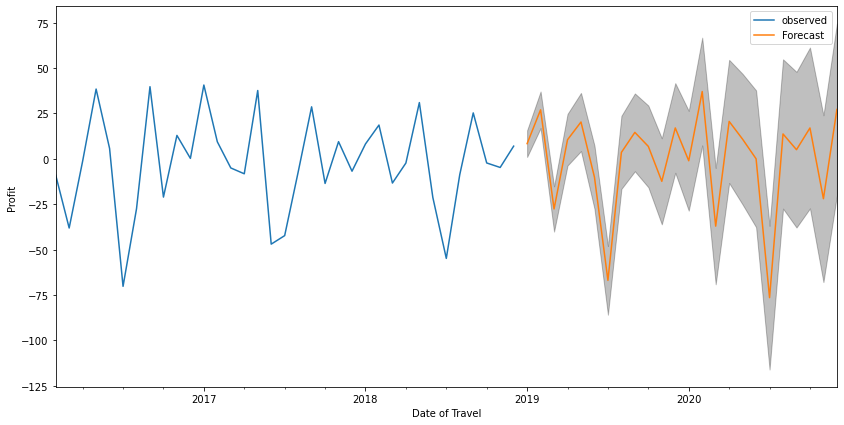

In [137]:
# Forecasts for two years for yello cab into the future
pred_uc2 = results2.get_forecast(steps=24)
pred_ci2 = pred_uc2.conf_int()
ax = py.plot(label='observed', figsize=(14, 7))
pred_uc2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date of Travel')
ax.set_ylabel('Profit')
plt.legend()
plt.show()

## Saving Pink Cab Model

In [176]:
import joblib
joblib.dump(results, 'pink_model.pkl') 

['pink_model.pkl']

## Saving Yellow Cab Model

In [177]:
import joblib
joblib.dump(results2, 'Yellow_model.pkl') 

['Yellow_model.pkl']

<h1 align='center' style='color:black'>  Recommendations </h1>

##   After evaluation of both cabs the yellow one was found better than the pink one, below are some points the comparison depended on:

### 1.	Users Number :  The users number of yellow cab is greater than that for pink cab.
### 2.	Customers Covered by Company : The Customers number of yellow cab is greater than that for pink cab.
### 3.	Number of Travels : The yellow cab has more travels than the pink cab.
### 4.	Age of  Customers :  All ages prefer the yellow cab than the pink one.
### 5.	Gender of Customers : The yellow cab is extremely liked by both genders.
### 6.	Average Profit per KM: The yellow cab profit in average is more than the double profit of pink.
### 7.	Profit per Income : The high and medium income users prefer the yellow cab.
### 8.	Profit Forecasting: After forecasting the profit loss the yellow cab got less loss than pink one.

##  Depending on the above comparison we found that the yellow cab is better than the pink cab.